In [43]:
%pwd # print woriking directory
%cd yolov5/
!pip install -r requirements.txt

C:\Users\AI\Auto_Farming\yolov5


- <font color=red>cv2.imwrite(“파일명.확장자”, 프레임이미지, 옵션)</font>
  - params=[cv2.IMWRITE_PNG_COMPRESSION, 0]) : 압축 하지 않는 PNG, 세 번째 파라미터는 압축률로 0~9까지 설정 가능 (0은 압축 없음)

In [51]:
import os
import glob
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

exp_path = "C:/Users/AI/Auto_Farming/yolov5/runs/detect/exp/"
path = 'C:/Users/AI/Auto_Farming/yolov5/'
weight = 'C:/Users/AI/Auto_Farming/yolov5/runs/train/insam_yolov5s_results/weights/best.pt'
source = 'C:/Users\AI/Auto_Farming/image/capture.png' 
save_img = 'C:/Users\AI/Auto_Farming/image/capture.png'
coordinate_path = "C:/Users/AI/Auto_Farming/yolov5/runs/detect/exp/labels/"

cap = cv2.VideoCapture(1)
while True :
    try:
        os.unlink(exp_path+"labels/capture.txt")
    except:
        print("")
    ret, frame = cap.read()
    break if not ret 
    resize_frame = resize_frame[:,:480]
    key = cv2.waitKey(99)
    cv2.imshow("test", resize_frame)
    cv2.imwrite(save_img, resize_frame,
               params=[cv2.IMWRITE_PNG_COMPRESSION, 0])
    !python {path}detect3.py --weight {weight} --img 640 --source {source} --save-txt --exist-ok --hide-conf --hide-labels
    break if cv2.waitKey(1) & 0xFF == ord('q')
cap.release()
cv2.destroyAllWindows()


detect3: weights=['C:/Users/AI/Auto_Farming/yolov5/runs/train/insam_yolov5s_results/weights/best.pt'], source=C:/Users\AI/Auto_Farming/image/capture.png, data=data\coco128.yaml, imgsz=[1088, 1088], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=True, line_thickness=3, hide_labels=True, hide_conf=True, half=False, dnn=False, vid_stride=1
YOLOv5  v6.2-219-ga83d2a5 Python-3.9.12 torch-1.12.1 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 C:\Users\AI\Auto_Farming\image\capture.png: 1088x1088 6 Ginsengs, 7 heads, 593.4ms
Speed: 4.0ms pre-process, 593.4ms inference, 11.0ms NMS per image at shape (1, 3, 1088, 1088)
Results saved to runs\detect\exp
225 labels saved to runs\detect\exp\labels
detect3: weights=['C:/Users/AI/Auto_Far

detect3: weights=['C:/Users/AI/Auto_Farming/yolov5/runs/train/insam_yolov5s_results/weights/best.pt'], source=C:/Users\AI/Auto_Farming/image/capture.png, data=data\coco128.yaml, imgsz=[1088, 1088], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=True, line_thickness=3, hide_labels=True, hide_conf=True, half=False, dnn=False, vid_stride=1
YOLOv5  v6.2-219-ga83d2a5 Python-3.9.12 torch-1.12.1 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 C:\Users\AI\Auto_Farming\image\capture.png: 1088x1088 10 Ginsengs, 10 heads, 595.4ms
Speed: 4.0ms pre-process, 595.4ms inference, 1.0ms NMS per image at shape (1, 3, 1088, 1088)
Results saved to runs\detect\exp
225 labels saved to runs\detect\exp\labels
detect3: weights=['C:/Users/AI/Auto_Far

In [1]:
import numpy as np
import math

#좌표 save_txt read
coordinate_path = "C:/Users/AI/Auto_Farming/yolov5/runs/detect/exp/labels/"
with open(coordinate_path+"capture.txt", "r") as f:
    txt = f.readlines()  # 해당 파일 줄별 리스트 형태로 반환

# ginseng, head 좌표 따로 모으는 반복문
gc, hc, ga, min_gl = [], [], [], 640
[gc.append(i) if i[0] == '0' else hc.append(i) for i in txt]

# 인삼, 뇌두 디텍션 개수
gn, hn = len(gc), len(hc)

# 인삼좌표와 뇌두 좌표 매칭 (1:1 매칭이 되지 않았을 때 조건 만들어야함)
for i in range(gn):
    g = gc[i][2:-1].split(' ')
    gltx, glty, grbx, grby = int(g[0]), int(g[1]), int(g[2]), int(g[3])
    lt, rt, lb, rb = [gltx, glty], [grbx, glty], [gltx, grby], [grbx, grby]
    globals()["g{}".format(i)] = [lt, rt, lb, rb]

    for j in range(hn):
        h = hc[j][2:-1].split(' ')
        hltx, hlty, hrbx, hrby = int(h[0]), int(h[1]), int(h[2]), int(h[3])
        globals()["h{}".format(j)] = [int((hltx+hrbx)/2), int((hlty+hrby)/2)]
        if (globals()[f"g{i}"][3][0] > globals()[f"h{j}"][0] > globals()[f"g{i}"][0][0])\
        and (globals()[f"g{i}"][3][1] > globals()[f"h{j}"][1] > globals()[f"g{i}"][0][1]):
            np.array(globals()["g{}".format(i)].append(globals()["h{}".format(j)]))

    ga.append(globals()["g{}".format(i)])

for v in ga:
    if min_gl > v[0][0]:
            min_gl = v[0][0] 

min_gl = g1[0][0] # 가장 가까운게 뇌두가 없어서 임시로 값 지정해둔거        
        
for i,value in enumerate(ga):
    if min_gl == value[0][0]:
        if len(value) == 5:
            globals()["g{}".format(i)] = np.array(globals()["g{}".format(i)])
            alt = abs(globals()["g{}".format(i)][0]-globals()["g{}".format(i)][-1])
            art = abs(globals()["g{}".format(i)][1]-globals()["g{}".format(i)][-1])
            alb = abs(globals()["g{}".format(i)][2]-globals()["g{}".format(i)][-1])
            arb = abs(globals()["g{}".format(i)][3]-globals()["g{}".format(i)][-1])
            altu, artu = int(math.sqrt((alt[0]**2)+(alt[1]**2))), int(math.sqrt((art[0]**2)+(art[1]**2)))
            albu, arbu = int(math.sqrt((alb[0]**2)+(alb[1]**2))), int(math.sqrt((arb[0]**2)+(arb[1]**2)))
            bgc = {'LT':altu, 'RT':artu, 'LB':albu, 'RB':arbu}
            # 딕셔너리 value 값 기준 정렬
            bgc_sorted=sorted(bgc.items(), key=lambda x:x[1])
            # 각도 도출
            if bgc_sorted[1][1] - bgc_sorted[0][1] < 13:
                if bgc_sorted[0][0] == 'RT' and bgc_sorted[1][0] == 'RB':
                    print("0도")
                elif bgc_sorted[1][0] == 'RT' and bgc_sorted[0][0] == 'RB':
                    print("0도")
                elif bgc_sorted[0][0] == 'LT'and bgc_sorted[1][0] == 'RT': 
                    print("90도")
                elif bgc_sorted[1][0] == 'LT'and bgc_sorted[0][0] == 'RT':
                    print("90도")
                elif bgc_sorted[0][0] == 'LT' and bgc_sorted[1][0] == 'LB':
                    print("180도")
                elif bgc_sorted[1][0] == 'LT' and bgc_sorted[0][0] == 'LB':
                    print("180도")
                elif bgc_sorted[0][0] == 'LB' and bgc_sorted[1][0] == 'RB': 
                    print("270도")
                elif bgc_sorted[1][0] == 'LB' and bgc_sorted[0][0] == 'RB':
                    print("270도")
            else:
                if bgc_sorted[0][0] == 'RT':
                    print("45도")
                elif bgc_sorted[0][0] == 'LT':
                    print("135도")
                elif bgc_sorted[0][0] == 'LB': 
                    print("225도")
                elif bgc_sorted[0][0] == 'RB':
                    print("315도")
            print(f'뇌두 좌표 : {globals()["g{}".format(i)][-1]}')
        elif len(value) == 4:
            print("뇌두 없음")
        else:
            print("뭉쳐 있음")
        
    else:
        pass

print()

뭉쳐 있음



In [635]:
globals()["g{}".format(i)][3]-globals()["g{}".format(i)][-1])

[[[639, 470], [674, 470], [639, 645], [674, 645], [652, 489]],
 [[217, 446], [458, 446], [217, 489], [458, 489], [447, 462]],
 [[162, 988], [422, 988], [162, 1064], [422, 1064]],
 [[244, 374], [522, 374], [244, 446], [522, 446], [510, 387]],
 [[214, 292], [540, 292], [214, 345], [540, 345], [231, 338], [519, 312]],
 [[652, 102], [700, 102], [652, 303], [700, 303], [676, 289]],
 [[722, 182], [792, 182], [722, 289], [792, 289], [785, 275]],
 [[658, 401], [959, 401], [658, 464], [959, 464], [676, 420]],
 [[877, 488], [930, 488], [877, 688], [930, 688], [891, 506]],
 [[907, 181], [964, 181], [907, 396], [964, 396], [954, 380], [935, 200]]]

In [630]:
bgc_sorted[0][0]

'RT'

In [631]:
print("45도") if bgc_sorted[0][0] == 'RT' else none

45도


In [565]:
# 딕셔너리 value 값 기준 정렬
bgc_sorted=sorted(bgc.items(), key=lambda x:x[1])

In [573]:
bgc_sorted[1][1] - bgc_sorted[0][1]

In [579]:
print(bgc_sorted)

[('RT', 19), ('RB', 29), ('LT', 230), ('LB', 231)]


In [568]:
print(sorted(bgc,key=lambda x:bgc[x]))

['RT', 'RB', 'LT', 'LB']


In [508]:
for i, value in enumerate(ga):
    print(i,value)

0 [[639, 470], [674, 470], [639, 645], [674, 645], [652, 489]]
1 [[217, 446], [458, 446], [217, 489], [458, 489], [447, 462]]
2 [[162, 988], [422, 988], [162, 1064], [422, 1064]]
3 [[244, 374], [522, 374], [244, 446], [522, 446], [510, 387]]
4 [[214, 292], [540, 292], [214, 345], [540, 345], [231, 338], [519, 312]]
5 [[652, 102], [700, 102], [652, 303], [700, 303], [676, 289]]
6 [[722, 182], [792, 182], [722, 289], [792, 289], [785, 275]]
7 [[658, 401], [959, 401], [658, 464], [959, 464], [676, 420]]
8 [[877, 488], [930, 488], [877, 688], [930, 688], [891, 506]]
9 [[907, 181], [964, 181], [907, 396], [964, 396], [954, 380], [935, 200]]


In [371]:
print(g0)

[[639, 470], [674, 470], [639, 645], [674, 645], [652, 489]]


In [350]:
type(g0)

list

In [310]:
aLT = abs(g0[0]-g0[-1])
aRT = abs(g0[1]-g0[-1]) 
aLB = abs(g0[2]-g0[-1])
aRB = abs(g0[3]-g0[-1])
aLT[0]
print(aLT, aRT, aLB, aRB)

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [311]:
#유클리드 거리 구하기
import math
aLTu=int(math.sqrt((aLT[0]**2)+(aLT[1]**2)))
aRTu=int(math.sqrt((aRT[0]**2)+(aRT[1]**2)))
aLBu=int(math.sqrt((aLB[0]**2)+(aLB[1]**2)))
aRBu=int(math.sqrt((aRB[0]**2)+(aRB[1]**2)))

In [262]:
print(aLTu, aRTu, aLBu, aRBu)

23 29 156 157


In [127]:
bounding_box = [aLTu, aRTu, aLBu, aRBu]
bounding_box_sort = sorted(bounding_box)
print(bounding_box_sort)

[23, 29, 156, 157]


In [51]:

if (bounding_box_sort[1] - bounding_box_sort[0]) < 10 : #직각 메커니즘
    print('직각')
    
else: # 직각 아닌 메커니즘
    if bounding_box[0] == bounding_box[0]: #좌상단
        FLT
    elif bo unding_box[0] == bounding_box[1]: #우상단
        FRT
    elif bounding_box[0] == bounding_box[2]: #좌하단
        FLB
    elif bounding_box[0] == bounding_box[3]: #우하단
        FRB
    if bounding_box[1] == bounding_box[0]: #좌상단
        SLT
    elif bounding_box[1] == bounding_box[1]: #우상단
        SRT
    elif bounding_box[1] == bounding_box[2]: #좌하단
        SLB
    elif bounding_box[1] == bounding_box[3]: #우하단
        SRB


SyntaxError: invalid syntax (615712377.py, line 7)

In [614]:
min_gl = v[0][0] if min_gl > v[0][0] else print()

TypeError: '>' not supported between instances of 'builtin_function_or_method' and 'int'

45도


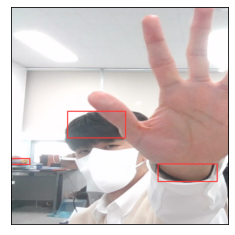

In [40]:
#디텍션 결과 이미지로
exp_path = "C:/Users/AI/Auto_Farming/yolov5/runs/detect/exp/"
img1 = cv2.imread(exp_path+'capture.png', cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.xticks([]); plt.yticks([])
plt.imshow(img1)

## ROI에 도형 그리기

- <font color=red>cv2.rectangle(배경이미지, 좌상단점좌표, 우하단점좌표, 색상, 선두께)</font> : 사각형 그리기
- <font color=red>cv2.circle(배경이미지, 중심좌표, 반지름, 색상, 선두께)</font> : 원 그리기

604.0
276.5


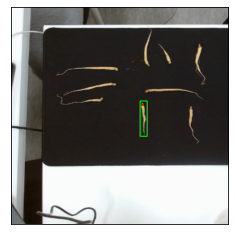

In [628]:
import cv2
import matplotlib.pyplot as plt

path12 = "C:/Users/AI/Auto_Farming/image/capture.png"
img12 = cv2.imread(path12, cv2.IMREAD_COLOR)
img12 = cv2.cvtColor(img12, cv2.COLOR_BGR2RGB)

img12 = cv2.rectangle(img12, (g0[0][0], g0[0][1]), (g0[3][0], g0[3][1]),(0,255,0), 3)
img12 = cv2.circle(img12, (g0[-1][0],g0[-1][1]),5,(255,0,0), -1)


x13 = (587+621)/2
y13 = (78+475)/2
print(x13)
print(y13)
img13 = cv2.circle(img12, (int(x13), int(y13)),3,(255,0,0), -1)

plt.xticks([]); plt.yticks([])
plt.imshow(img12)

# 데이터 전처리

In [ ]:
import cv2
webcam = cv2.VideoCapture(1)
webcam.set(cv2.CAP_PROP_FRAME_WIDTH, 1080)
webcam.set(cv2.CAP_PROP_FRAME_HEIGHT, 1080)
if not webcam.isOpened():
    print("Could not open webcam")
    exit()
while webcam.isOpened():
    status, frame = webcam.read()
    frame = frame[:,:720]
    if status:
        cv2.imshow("test", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
webcam.release()
cv2.destroyAllWindows()

In [ ]:
# # 인삼 좌표 도출
# for i in range(gn):
#     g, gltx, glty, grbx, grby = gc[i][2:-1].split(' '), int(g[0]), int(g[1]), int(g[2]), int(g[3])

# #뇌두 중심점 도출
# for i in range(hn):
#     h, hltx, hlty, hrbx, hrby = hc[i][2:-1].split(' '), int(h[0]), int(h[1]), int(h[2]), int(h[3])
#     hp = [int((hltx+hrbx)/2), int((hlty+hrby)/2)]

In [ ]:
# # 인삼, 뇌두 디텍션 개수
# gn = len(ginseng_coordinate)
# hn = len(head_coordinate)
# print(f'인삼 갯수 : {gn}')
# print(f'뇌두 갯수 : {hn}')
# print('')

# # 인삼 좌표 도출
# for i in range(gn):
#     g = gc[i][2:-1].split(' ')
#     gltx = g[0]
#     glty = g[1]
#     grbx = g[2]
#     grby = g[3]

#     print(f'(좌상단 : {gltx}, {glty})')
#     print(f'(우상단 : {grbx}, {glty})')
#     print(f'(좌하단 : {gltx}, {grby})')
#     print(f'(우하단 : {grbx}, {grby})')
#     print('')
    

In [ ]:
# #인삼 디텍션된 것 크롭
# ginseng_crop_path = "C:/Users/AI/Auto_Farming/yolov5/runs/detect/exp/crops/Ginseng/"
# ginseng_crop_img = cv2.imread(ginseng_crop_path+'capture.jpg', cv2.IMREAD_COLOR)
# ginseng_crop_img = cv2.cvtColor(ginseng_crop_img, cv2.COLOR_BGR2RGB)
# plt.xticks([]); plt.yticks([])
# plt.imshow(ginseng_crop_img)

In [ ]:
# #뇌두 디텍션된 것 크롭
# head_crop_path = "C:/Users/AI/Auto_Farming/yolov5/runs/detect/exp/crops/head/"
# head_crop_img = cv2.imread(head_crop_path+"capture.jpg", cv2.IMREAD_COLOR)
# head_crop_img = cv2.cvtColor(head_crop_img, cv2.COLOR_BGR2RGB)
# plt.xticks([]); plt.yticks([])
# plt.imshow(head_crop_img)

In [ ]:
# list1=glob.glob(exp_path+'crops/Ginseng/capture*')
# for i in list1:
#     os.unlink(i)
# list2=glob.glob(exp_path+'crops/head/capture*')
# for i in list2:
#     os.unlink(i)

In [ ]:
#     # 원본 동영상 크기 정보
#     w = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
#     h = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
#     print("원본 동영상 너비(가로) : {}, 높이(세로) : {}".format(w, h))

#     # 동영상 크기 변환
#     cap.set(cv2.CAP_PROP_FRAME_WIDTH, 480) # 가로
#     cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480) # 세로

#     # 변환된 동영상 크기 정보
#     w = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
#     h = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
#     print("변환된 동영상 너비(가로) : {}, 높이(세로) : {}".format(w, h))

In [ ]:
    # 이미지 보정 시작 #
#     img = cv2.imread("C:/Users\AI/Auto_Farming/image/capture.png", cv2.IMREAD_COLOR)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     plt.xticks([]); plt.yticks([])
#     plt.imshow(img)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
#     lower = np.array([20, 100,200])
#     higher = np.array([30, 255, 255])
#     mask = cv2.inRange(hsv, lower, higher)
#     img_hsv = cv2.bitwise_and(img, img, mask=mask)
#     img_gray = cv2.cvtColor(img_hsv, cv2.COLOR_RGB2GRAY)
    # 이미지 보정 끝 #

In [ ]:
# os 라이브러리에 디렉터리 안에 있는 파일 명 리스트로 받는 함수 쓰고
# 거기서 정렬한다음에 
# 맨 뒤에꺼 하면 최신 파일 되니까
# 그거 로드하면 되긴할듯 

In [ ]:
# 갯수 =
# 좌표list = []
# 가장 앞쪽에 있는거 좌표 = []
# 가장 앞쪽에 있는거 좌표 로봇에 보내주고
# 갯수가 n개 이하되면 피서한테 튕기면서 당겨오라고 하고

In [ ]:
# 생육상태 파악 <딥러닝(상민)
# 외부인 침입 감지 <딥러닝(대철)
# 컨베이어벨트 작동 여부 확인 <딥러닝(?)
# 환기장치, 워터벨브 등 엑추에이터 작동여부 확인 <딥러닝(?)
# 챗봇상담 < 딥러닝(?)

In [ ]:
!python detect.py --weight ./runs/train/insam_yolov5s_results/weights/best.pt --source '{img}'